In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logit, expit
import scipy.stats

# 1) Normal distribution

In [16]:
df = pd.DataFrame(columns = None)
df['normal_m_8_sd_15'] = np.random.normal(loc=8, scale=15, size=10000)
df['normal_m_8_sd_10'] = np.random.normal(loc=8, scale=10, size=10000)
df['normal_m_8_sd_3'] = np.random.normal(loc=8, scale=3, size=10000)
df['normal_m_8_sd_1'] = np.random.normal(loc=8, scale=1, size=10000)

In [17]:
df_melted = df.melt()

## Different variance and mean
### 16 bins

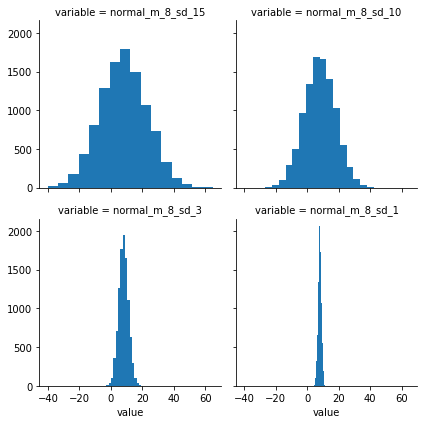

In [18]:
fGrid=sns.FacetGrid(df_melted, col="variable", sharex=True, col_wrap=2)
fGrid.map(plt.hist,"value",cumulative=False,bins=16)

### 128 bins

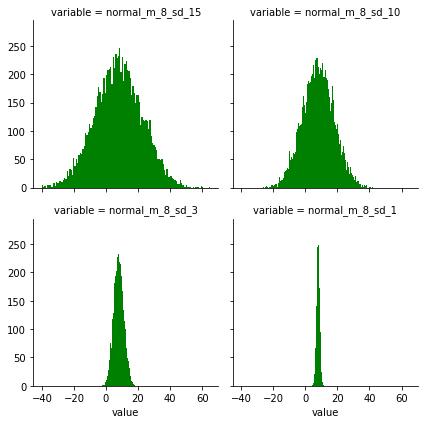

In [19]:
fGrid_128=sns.FacetGrid(df_melted, col="variable", sharex=True, col_wrap=2)
fGrid_128.map(plt.hist,"value", cumulative=False, bins=128, color='g')

#### /// If number of bins is high the plot is more precise and informative. If variance is low the samples are located close to the mean of the distribution. When variance is low we can improve readability of the plot by decreasing range of x arguments:

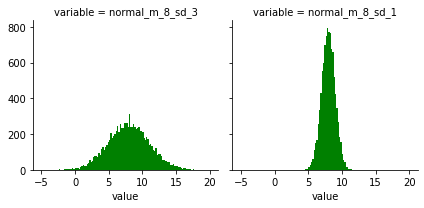

In [20]:
df_2melted = df[['normal_m_8_sd_3','normal_m_8_sd_1']].copy().melt()
bins = np.linspace(start=-5, stop=20, num=128)
fGrid_128=sns.FacetGrid(df_2melted, col="variable", sharex=True, col_wrap=2)
fGrid_128.map(plt.hist,"value", cumulative=False, bins=bins, color='g')

#### /// In my opinion this is the best way to improve readability of the plot.

### Cumulative 128 bins

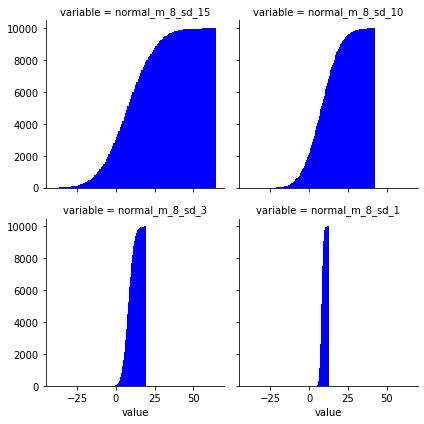

In [22]:
fGrid_128=sns.FacetGrid(df_melted, col="variable", sharex=True, col_wrap=2)
fGrid_128.map(plt.hist,"value", cumulative=True, bins=128, color='b')

#### /// The same as previously - when variance is low the good solution would be to decrease range of x arguments so that the plot is more informative

# 2) Normal distribution - inverse logit

In [23]:
expit_melted = pd.DataFrame(df_melted['variable'])
expit_melted['value'] = expit(df_melted['value'])

In [24]:
expit_melted.head()

,variable,value
0,normal_m_8_sd_15,1.000000
1,normal_m_8_sd_15,0.000002
2,normal_m_8_sd_15,0.999205
3,normal_m_8_sd_15,1.000000
4,normal_m_8_sd_15,0.999500


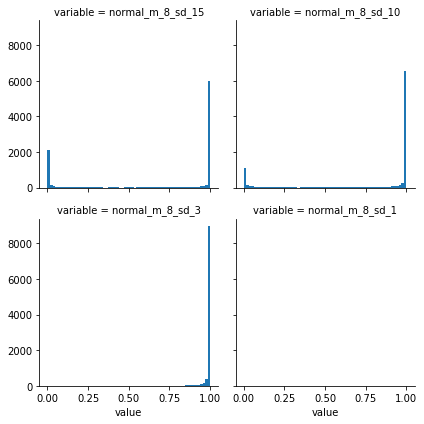

In [25]:
fGrid=sns.FacetGrid(expit_melted, col="variable", sharex=True, col_wrap=2)
fGrid.map(plt.hist,"value", cumulative=False, bins=64)

### Cumulative

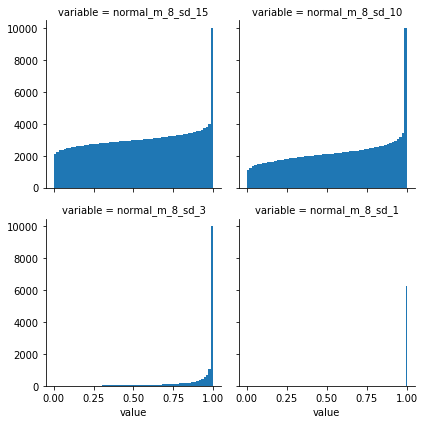

In [26]:
fGrid=sns.FacetGrid(expit_melted, col="variable", sharex=True, col_wrap=2)
fGrid.map(plt.hist,"value", cumulative=True, bins=64)

#### /// Presenting normal distributions with inverse logit that have standard deviation from wide range (like from 1 to 15) on the plots with the sme y and x range is a good way to compare them and see how much different they are. But usually readability of at least one distribution is very week (distribution with sd equal to 1)

# 3) Poisson distribution

### Different lambdas

In [12]:
df_poisson = pd.DataFrame(columns = None)
s = np.random.poisson(lam=8, size=10000)
df_poisson['poiss_lam_2_size_10000'] = np.random.poisson(lam=2, size=10000)
df_poisson['poiss_lam_6_size_10000'] = np.random.poisson(lam=6, size=10000)
df_poisson['poiss_lam_18_size_10000'] = np.random.poisson(lam=18, size=10000)
poisson_melted = df_poisson.melt()

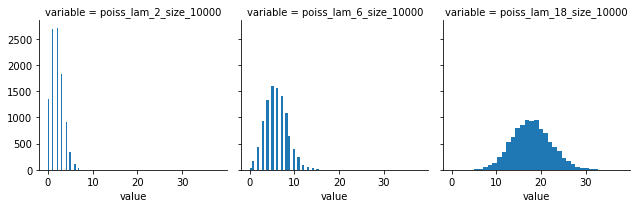

In [13]:
fGrid=sns.FacetGrid(poisson_melted, col="variable", sharex=True, col_wrap=3)
fGrid.map(plt.hist,"value",cumulative=False,bins=32)

##### /// If lambda is high (lambda > 15) the distribution shape is a bit simillar to normal distribution 

### Different sizes

In [14]:
df_1 = pd.DataFrame(np.random.poisson(lam=5, size=50))
df_2 = pd.DataFrame(np.random.poisson(lam=5, size=100))
df_3 = pd.DataFrame(np.random.poisson(lam=5, size=10000))

df_poisson = pd.concat([df_1,df_2,df_3], ignore_index=True, axis='columns')
df_poisson.columns = ["poiss_lam_5_size_100", "poiss_lam_5_size_1000", "poiss_lam_5_size_10000"]
poisson_melted = df_poisson.melt()

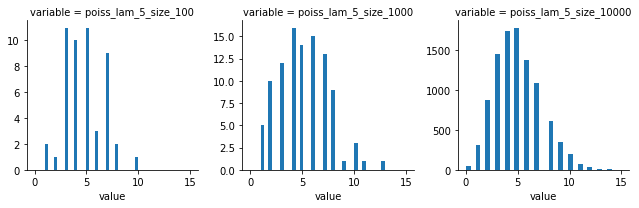

In [15]:
fGrid=sns.FacetGrid(poisson_melted, col="variable", sharex=True, sharey=False, col_wrap=3)
fGrid.map(plt.hist,"value",cumulative=False,bins=32)

##### /// If the size is too small the distribution shape is often different from expected - 

# 4) Beta distribution

In [16]:
df_beta = pd.DataFrame(columns = None)
df_beta['beta_a_0.8_b_0.4'] = np.random.beta(a=0.8,b=0.4,size=10000)
df_beta['beta_a_0.25_b_1.0'] = np.random.beta(a=0.25,b=1.0,size=10000)
df_beta['beta_a_2.0_b_2.0'] = np.random.beta(a=2.0,b=2.0,size=10000)
df_beta['beta_a_7.0_b_7.0'] = np.random.beta(a=7.0,b=7.0,size=10000)
beta_melted = df_beta.melt()

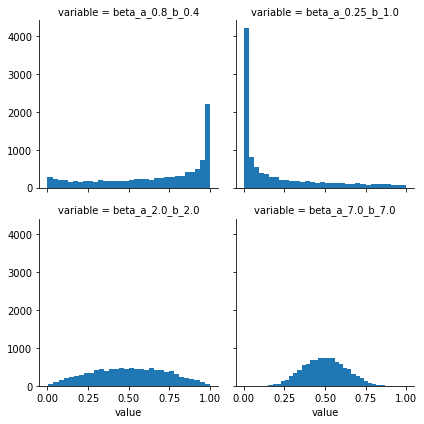

In [17]:
fGrid=sns.FacetGrid(beta_melted, col="variable", sharex=True, col_wrap=2)
fGrid.map(plt.hist,"value",cumulative=False, bins=32)

In [18]:
df_beta = pd.DataFrame(columns = None)
print(scipy.stats.beta(0.8, 0.4, 0.6,0.3,))
#df_beta['beta_a_0.25_b_1.0'] = scipy.stats.beta(a=0.25,b=1.0,size=10000)
beta_melted = df_beta.melt()

In [19]:
df_beta.head()

""


# 5) Log-normal distribution

## mean = constant

In [29]:
df_lognormal = pd.DataFrame(columns = None)
df_lognormal["lognormal_m=3_sd=0.1"] = np.random.lognormal(3,0.1,10000)
df_lognormal["lognormal_m=3_sd=0.3"] = np.random.lognormal(3,0.3,10000)
df_lognormal["lognormal_m=3_sd=0.5"] = np.random.lognormal(3,0.5,10000)
df_lognormal["lognormal_m=3_sd=1.5"] = np.random.lognormal(3,1.5,10000)
lognormal_melted = df_lognormal.melt()

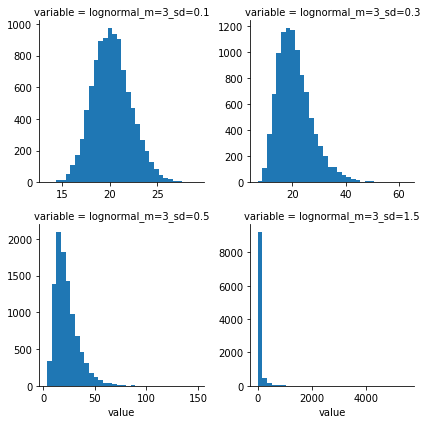

In [30]:
fGrid=sns.FacetGrid(lognormal_melted, col="variable", sharex=False, sharey=False, col_wrap=2)
fGrid.map(plt.hist, "value", cumulative=False, bins=32)

### Cumulative

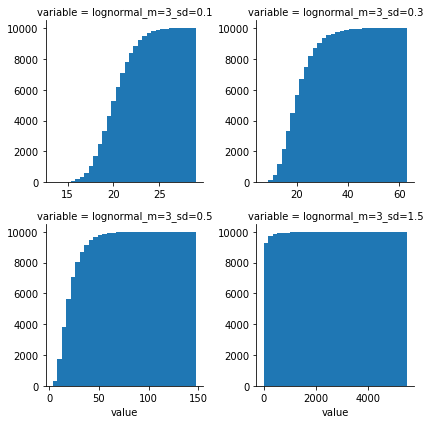

In [31]:
fGrid=sns.FacetGrid(lognormal_melted, col="variable", sharex=False, sharey=False, col_wrap=2)
fGrid.map(plt.hist, "value", cumulative=True, bins=32)

## sd = constant

In [32]:
df_lognormal = pd.DataFrame(columns = None)
df_lognormal["lognormal_m=1_sd=0.5"] = np.random.lognormal(1,0.5,10000)
df_lognormal["lognormal_m=2_sd=0.5"] = np.random.lognormal(2,0.5,10000)
df_lognormal["lognormal_m=5_sd=0.5"] = np.random.lognormal(5,0.5,10000)
df_lognormal["lognormal_m=10_sd=0.5"] = np.random.lognormal(10,0.5,10000)
lognormal_melted = df_lognormal.melt()

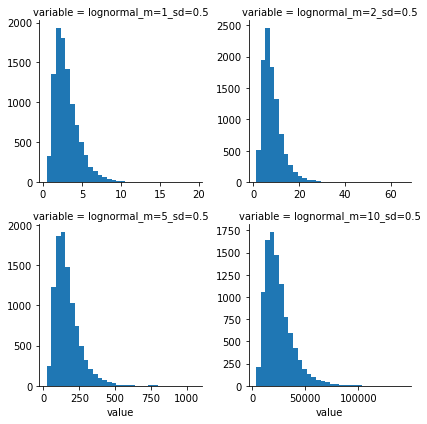

In [33]:
fGrid=sns.FacetGrid(lognormal_melted, col="variable", sharex=False, sharey=False, col_wrap=2)
fGrid.map(plt.hist, "value", cumulative=False, bins=32)

### Cumulative

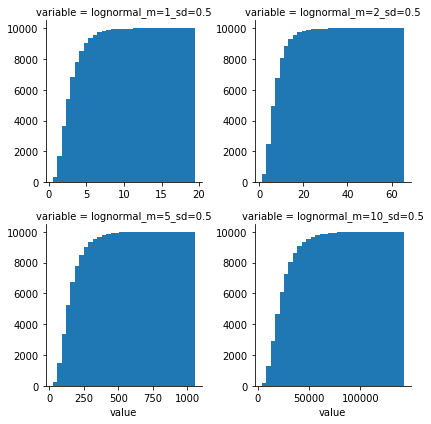

In [34]:
fGrid=sns.FacetGrid(lognormal_melted, col="variable", sharex=False, sharey=False, col_wrap=2)
fGrid.map(plt.hist, "value", cumulative=True, bins=32)

##### /// For log-normal distribution mean changes are less visible than sd changes 